#Question 2
Can we find other tracks similar to Suzuka that we can use to predict performance for the race in 2024?

In [38]:
import warnings
warnings.filterwarnings('ignore')

!pip install fastf1 > /dev/null

import fastf1
from fastf1 import get_session
from fastf1.core import InvalidSessionError
from datetime import datetime

In [39]:
# data imports
import pandas as pd
import numpy as np
from plotnine import *

# modelling
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV # Linear Regression Model
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer #Z-score variables

#clustering
from sklearn.neighbors import NearestNeighbors

# performance
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error #model evaluation

# model validation imports
from sklearn.model_selection import train_test_split # simple TT split cv

# pipeline imports
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

%matplotlib inline

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
def get_race_data(race, year):
  session = fastf1.get_session(year, race, 'R')
  session.load(telemetry=False)
  print(session.session_info)
  weather_data = session.laps.get_weather_data()
  #print(weather_data)
  laps = session.laps
  laps = laps.reset_index(drop=True)
  weather_data = weather_data.reset_index(drop=True)

  # exclude the 'Time' column from weather data when joining
  race_data = pd.concat([laps, weather_data.loc[:, ~(weather_data.columns == 'Time')]], axis=1)
  race_data['Year'] = year
  race_data['Event'] = session.session_info['Meeting']['Name']
  return race_data

def get_races_data(year):
  races = []
  for race in range(1, 23):  # Assuming maximum of 22 races in a season
    try:
      races.append(get_race_data(race, year))
    except InvalidSessionError:
      break
  return races

In [42]:
#races_2023 = pd.read_csv('/content/drive/MyDrive/CPSC 392/Final/2023_races_data.csv')
races_data_copy = pd.concat(get_races_data(2023))
races_data = races_data_copy

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.3.5]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core         

{'Meeting': {'Key': 1141, 'Name': 'Bahrain Grand Prix', 'OfficialName': 'FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023', 'Location': 'Sakhir', 'Country': {'Key': 36, 'Code': 'BRN', 'Name': 'Bahrain'}, 'Circuit': {'Key': 63, 'ShortName': 'Sakhir'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 7953, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 3, 5, 18, 0), 'EndDate': datetime.datetime(2023, 3, 5, 20, 0), 'GmtOffset': datetime.timedelta(seconds=10800), 'Path': '2023/2023-03-05_Bahrain_Grand_Prix/2023-03-05_Race/'}


core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for Saudi Arabian Grand Prix - Race [v3.3.5]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
c

{'Meeting': {'Key': 1142, 'Name': 'Saudi Arabian Grand Prix', 'OfficialName': 'FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023', 'Location': 'Jeddah', 'Country': {'Key': 153, 'Code': 'KSA', 'Name': 'Saudi Arabia'}, 'Circuit': {'Key': 149, 'ShortName': 'Jeddah'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 7779, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 3, 19, 20, 0), 'EndDate': datetime.datetime(2023, 3, 19, 22, 0), 'GmtOffset': datetime.timedelta(seconds=10800), 'Path': '2023/2023-03-19_Saudi_Arabian_Grand_Prix/2023-03-19_Race/'}


core           INFO 	Loading data for Australian Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for Australian Grand Prix - Race [v3.3.5]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core   

{'Meeting': {'Key': 1143, 'Name': 'Australian Grand Prix', 'OfficialName': 'FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2023', 'Location': 'Melbourne', 'Country': {'Key': 5, 'Code': 'AUS', 'Name': 'Australia'}, 'Circuit': {'Key': 10, 'ShortName': 'Melbourne'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 7787, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 4, 2, 15, 0), 'EndDate': datetime.datetime(2023, 4, 2, 17, 0), 'GmtOffset': datetime.timedelta(seconds=36000), 'Path': '2023/2023-04-02_Australian_Grand_Prix/2023-04-02_Race/'}


core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for Azerbaijan Grand Prix - Race [v3.3.5]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core   

{'Meeting': {'Key': 1207, 'Name': 'Azerbaijan Grand Prix', 'OfficialName': 'FORMULA 1 AZERBAIJAN GRAND PRIX 2023', 'Location': 'Baku', 'Country': {'Key': 30, 'Code': 'AZE', 'Name': 'Azerbaijan'}, 'Circuit': {'Key': 144, 'ShortName': 'Baku'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 9070, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 4, 30, 15, 0), 'EndDate': datetime.datetime(2023, 4, 30, 17, 0), 'GmtOffset': datetime.timedelta(seconds=14400), 'Path': '2023/2023-04-30_Azerbaijan_Grand_Prix/2023-04-30_Race/'}


core           INFO 	Loading data for Miami Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for Miami Grand Prix - Race [v3.3.5]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           IN

{'Meeting': {'Key': 1208, 'Name': 'Miami Grand Prix', 'OfficialName': 'FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2023', 'Location': 'Miami', 'Country': {'Key': 19, 'Code': 'USA', 'Name': 'United States'}, 'Circuit': {'Key': 151, 'ShortName': 'Miami'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 9078, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 5, 7, 15, 30), 'EndDate': datetime.datetime(2023, 5, 7, 17, 30), 'GmtOffset': datetime.timedelta(days=-1, seconds=72000), 'Path': '2023/2023-05-07_Miami_Grand_Prix/2023-05-07_Race/'}


core           INFO 	Loading data for Monaco Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for Monaco Grand Prix - Race [v3.3.5]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           

{'Meeting': {'Key': 1210, 'Name': 'Monaco Grand Prix', 'OfficialName': 'FORMULA 1 GRAND PRIX DE MONACO 2023', 'Location': 'Monaco', 'Country': {'Key': 114, 'Code': 'MON', 'Name': 'Monaco'}, 'Circuit': {'Key': 22, 'ShortName': 'Monte Carlo'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 9094, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 5, 28, 15, 0), 'EndDate': datetime.datetime(2023, 5, 28, 17, 0), 'GmtOffset': datetime.timedelta(seconds=7200), 'Path': '2023/2023-05-28_Monaco_Grand_Prix/2023-05-28_Race/'}


core           INFO 	Loading data for Spanish Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Race [v3.3.5]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core         

{'Meeting': {'Key': 1211, 'Name': 'Spanish Grand Prix', 'OfficialName': 'FORMULA 1 AWS GRAN PREMIO DE ESPAÑA 2023', 'Location': 'Barcelona', 'Country': {'Key': 1, 'Code': 'ESP', 'Name': 'Spain'}, 'Circuit': {'Key': 15, 'ShortName': 'Catalunya'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 9102, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 6, 4, 15, 0), 'EndDate': datetime.datetime(2023, 6, 4, 17, 0), 'GmtOffset': datetime.timedelta(seconds=7200), 'Path': '2023/2023-06-04_Spanish_Grand_Prix/2023-06-04_Race/'}


core           INFO 	Loading data for Canadian Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for Canadian Grand Prix - Race [v3.3.5]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core       

{'Meeting': {'Key': 1212, 'Name': 'Canadian Grand Prix', 'OfficialName': 'FORMULA 1 PIRELLI GRAND PRIX DU CANADA 2023', 'Location': 'Montréal', 'Country': {'Key': 46, 'Code': 'CAN', 'Name': 'Canada'}, 'Circuit': {'Key': 23, 'ShortName': 'Montreal'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 9110, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 6, 18, 14, 0), 'EndDate': datetime.datetime(2023, 6, 18, 16, 0), 'GmtOffset': datetime.timedelta(days=-1, seconds=72000), 'Path': '2023/2023-06-18_Canadian_Grand_Prix/2023-06-18_Race/'}


core           INFO 	Loading data for Austrian Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for Austrian Grand Prix - Race [v3.3.5]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core       

{'Meeting': {'Key': 1213, 'Name': 'Austrian Grand Prix', 'OfficialName': 'FORMULA 1 ROLEX GROSSER PREIS VON ÖSTERREICH 2023', 'Location': 'Spielberg', 'Country': {'Key': 17, 'Code': 'AUT', 'Name': 'Austria'}, 'Circuit': {'Key': 19, 'ShortName': 'Spielberg'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 9118, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 7, 2, 15, 0), 'EndDate': datetime.datetime(2023, 7, 2, 17, 0), 'GmtOffset': datetime.timedelta(seconds=7200), 'Path': '2023/2023-07-02_Austrian_Grand_Prix/2023-07-02_Race/'}


core           INFO 	Loading data for British Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for British Grand Prix - Race [v3.3.5]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core         

{'Meeting': {'Key': 1214, 'Name': 'British Grand Prix', 'OfficialName': 'FORMULA 1 ARAMCO BRITISH GRAND PRIX 2023', 'Location': 'Silverstone', 'Country': {'Key': 2, 'Code': 'GBR', 'Name': 'Great Britain'}, 'Circuit': {'Key': 2, 'ShortName': 'Silverstone'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 9126, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 7, 9, 15, 0), 'EndDate': datetime.datetime(2023, 7, 9, 17, 0), 'GmtOffset': datetime.timedelta(seconds=3600), 'Path': '2023/2023-07-09_British_Grand_Prix/2023-07-09_Race/'}


core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for Hungarian Grand Prix - Race [v3.3.5]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
INFO:fastf1.api:Fetching session status data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
INFO:fastf1.fastf1.req:No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
INFO:fastf1.api:Fetching lap count data...
req  

{'Meeting': {'Key': 1215, 'Name': 'Hungarian Grand Prix', 'OfficialName': 'FORMULA 1 QATAR AIRWAYS HUNGARIAN GRAND PRIX 2023', 'Location': 'Budapest', 'Country': {'Key': 14, 'Code': 'HUN', 'Name': 'Hungary'}, 'Circuit': {'Key': 4, 'ShortName': 'Hungaroring'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 9133, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 7, 23, 15, 0), 'EndDate': datetime.datetime(2023, 7, 23, 17, 0), 'GmtOffset': datetime.timedelta(seconds=7200), 'Path': '2023/2023-07-23_Hungarian_Grand_Prix/2023-07-23_Race/'}


core           INFO 	Loading data for Belgian Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for Belgian Grand Prix - Race [v3.3.5]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_d

{'Meeting': {'Key': 1216, 'Name': 'Belgian Grand Prix', 'OfficialName': 'FORMULA 1 MSC CRUISES BELGIAN GRAND PRIX 2023', 'Location': 'Spa-Francorchamps', 'Country': {'Key': 16, 'Code': 'BEL', 'Name': 'Belgium'}, 'Circuit': {'Key': 7, 'ShortName': 'Spa-Francorchamps'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 9141, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 7, 30, 15, 0), 'EndDate': datetime.datetime(2023, 7, 30, 17, 0), 'GmtOffset': datetime.timedelta(seconds=7200), 'Path': '2023/2023-07-30_Belgian_Grand_Prix/2023-07-30_Race/'}


core           INFO 	Loading data for Dutch Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for Dutch Grand Prix - Race [v3.3.5]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data.

{'Meeting': {'Key': 1217, 'Name': 'Dutch Grand Prix', 'OfficialName': 'FORMULA 1 HEINEKEN DUTCH GRAND PRIX 2023', 'Location': 'Zandvoort', 'Country': {'Key': 133, 'Code': 'NED', 'Name': 'Netherlands'}, 'Circuit': {'Key': 55, 'ShortName': 'Zandvoort'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 9149, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 8, 27, 15, 0), 'EndDate': datetime.datetime(2023, 8, 27, 17, 0), 'GmtOffset': datetime.timedelta(seconds=7200), 'Path': '2023/2023-08-27_Dutch_Grand_Prix/2023-08-27_Race/'}


core           INFO 	Loading data for Italian Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Race [v3.3.5]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_d

{'Meeting': {'Key': 1218, 'Name': 'Italian Grand Prix', 'OfficialName': 'FORMULA 1 PIRELLI GRAN PREMIO D’ITALIA 2023 ', 'Location': 'Monza', 'Country': {'Key': 13, 'Code': 'ITA', 'Name': 'Italy'}, 'Circuit': {'Key': 39, 'ShortName': 'Monza'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 9157, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 9, 3, 15, 0), 'EndDate': datetime.datetime(2023, 9, 3, 17, 0), 'GmtOffset': datetime.timedelta(seconds=7200), 'Path': '2023/2023-09-03_Italian_Grand_Prix/2023-09-03_Race/'}


core           INFO 	Loading data for Singapore Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for Singapore Grand Prix - Race [v3.3.5]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_stat

{'Meeting': {'Key': 1219, 'Name': 'Singapore Grand Prix', 'OfficialName': 'FORMULA 1 SINGAPORE AIRLINES SINGAPORE GRAND PRIX 2023 ', 'Location': 'Marina Bay', 'Country': {'Key': 157, 'Code': 'SGP', 'Name': 'Singapore'}, 'Circuit': {'Key': 61, 'ShortName': 'Singapore'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 9165, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 9, 17, 20, 0), 'EndDate': datetime.datetime(2023, 9, 17, 22, 0), 'GmtOffset': datetime.timedelta(seconds=28800), 'Path': '2023/2023-09-17_Singapore_Grand_Prix/2023-09-17_Race/'}


core           INFO 	Loading data for Japanese Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for Japanese Grand Prix - Race [v3.3.5]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status

{'Meeting': {'Key': 1220, 'Name': 'Japanese Grand Prix', 'OfficialName': 'FORMULA 1 LENOVO JAPANESE GRAND PRIX 2023 ', 'Location': 'Suzuka', 'Country': {'Key': 4, 'Code': 'JPN', 'Name': 'Japan'}, 'Circuit': {'Key': 46, 'ShortName': 'Suzuka'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 9173, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 9, 24, 14, 0), 'EndDate': datetime.datetime(2023, 9, 24, 16, 0), 'GmtOffset': datetime.timedelta(seconds=32400), 'Path': '2023/2023-09-24_Japanese_Grand_Prix/2023-09-24_Race/'}


core           INFO 	Loading data for Qatar Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for Qatar Grand Prix - Race [v3.3.5]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data.

{'Meeting': {'Key': 1221, 'Name': 'Qatar Grand Prix', 'OfficialName': 'FORMULA 1 QATAR AIRWAYS QATAR GRAND PRIX 2023', 'Location': 'Lusail', 'Country': {'Key': 149, 'Code': 'QAT', 'Name': 'Qatar'}, 'Circuit': {'Key': 150, 'ShortName': 'Lusail'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 9221, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 10, 8, 20, 0), 'EndDate': datetime.datetime(2023, 10, 8, 22, 0), 'GmtOffset': datetime.timedelta(seconds=10800), 'Path': '2023/2023-10-08_Qatar_Grand_Prix/2023-10-08_Race/'}


core           INFO 	Loading data for United States Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for United States Grand Prix - Race [v3.3.5]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for sess

{'Meeting': {'Key': 1222, 'Name': 'United States Grand Prix', 'OfficialName': 'FORMULA 1 LENOVO UNITED STATES GRAND PRIX 2023', 'Location': 'Austin', 'Country': {'Key': 19, 'Code': 'USA', 'Name': 'United States'}, 'Circuit': {'Key': 9, 'ShortName': 'Austin'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 9213, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 10, 22, 14, 0), 'EndDate': datetime.datetime(2023, 10, 22, 16, 0), 'GmtOffset': datetime.timedelta(days=-1, seconds=68400), 'Path': '2023/2023-10-22_United_States_Grand_Prix/2023-10-22_Race/'}


core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for Mexico City Grand Prix - Race [v3.3.5]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_

{'Meeting': {'Key': 1223, 'Name': 'Mexico City Grand Prix', 'OfficialName': 'FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2023', 'Location': 'Mexico City', 'Country': {'Key': 8, 'Code': 'MEX', 'Name': 'Mexico'}, 'Circuit': {'Key': 65, 'ShortName': 'Mexico City'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 9181, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 10, 29, 14, 0), 'EndDate': datetime.datetime(2023, 10, 29, 16, 0), 'GmtOffset': datetime.timedelta(days=-1, seconds=64800), 'Path': '2023/2023-10-29_Mexico_City_Grand_Prix/2023-10-29_Race/'}


core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for São Paulo Grand Prix - Race [v3.3.5]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_stat

{'Meeting': {'Key': 1224, 'Name': 'São Paulo Grand Prix', 'OfficialName': 'FORMULA 1 ROLEX GRANDE PRÊMIO DE SÃO PAULO 2023', 'Location': 'São Paulo', 'Country': {'Key': 10, 'Code': 'BRA', 'Name': 'Brazil'}, 'Circuit': {'Key': 14, 'ShortName': 'Interlagos'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 9205, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 11, 5, 14, 0), 'EndDate': datetime.datetime(2023, 11, 5, 16, 0), 'GmtOffset': datetime.timedelta(days=-1, seconds=75600), 'Path': '2023/2023-11-05_São_Paulo_Grand_Prix/2023-11-05_Race/'}


core           INFO 	Loading data for Las Vegas Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for Las Vegas Grand Prix - Race [v3.3.5]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_stat

{'Meeting': {'Key': 1225, 'Name': 'Las Vegas Grand Prix', 'OfficialName': 'FORMULA 1 HEINEKEN SILVER LAS VEGAS GRAND PRIX 2023', 'Location': 'Las Vegas', 'Country': {'Key': 19, 'Code': 'USA', 'Name': 'United States'}, 'Circuit': {'Key': 152, 'ShortName': 'Las Vegas'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 9189, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 11, 18, 22, 0), 'EndDate': datetime.datetime(2023, 11, 19, 0, 0), 'GmtOffset': datetime.timedelta(days=-1, seconds=57600), 'Path': '2023/2023-11-18_Las_Vegas_Grand_Prix/2023-11-18_Race/'}


core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for Abu Dhabi Grand Prix - Race [v3.3.5]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_stat

{'Meeting': {'Key': 1226, 'Name': 'Abu Dhabi Grand Prix', 'OfficialName': 'FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX 2023 ', 'Location': 'Yas Island', 'Country': {'Key': 21, 'Code': 'UAE', 'Name': 'United Arab Emirates'}, 'Circuit': {'Key': 70, 'ShortName': 'Yas Marina Circuit'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 9197, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2023, 11, 26, 17, 0), 'EndDate': datetime.datetime(2023, 11, 26, 19, 0), 'GmtOffset': datetime.timedelta(seconds=14400), 'Path': '2023/2023-11-26_Abu_Dhabi_Grand_Prix/2023-11-26_Race/'}


In [43]:
races_2023.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'Sector1Time', 'Sector2Time', 'Sector3Time', 'Sector1SessionTime',
       'Sector2SessionTime', 'Sector3SessionTime', 'SpeedI1', 'SpeedI2',
       'SpeedFL', 'SpeedST', 'IsPersonalBest', 'Compound', 'TyreLife',
       'FreshTyre', 'Team', 'LapStartTime', 'TrackStatus', 'Position',
       'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp',
       'WindDirection', 'WindSpeed', 'Year', 'Event'],
      dtype='object')

In [57]:
def new_col_names(cols, metric):
  changes = {}
  for col in cols:
    changes[col] = col + '_' + metric
  return changes

In [58]:
def get_track_data(df):
  tracks_means = df.groupby(['Event'], as_index=False)[continuous].mean()
  tracks_means.rename(columns = new_col_names(continuous, 'mean'), inplace = True)

  tracks_medians = df.groupby(['Event'], as_index=False)[continuous].median()
  tracks_medians.rename(columns = new_col_names(continuous, 'median'), inplace = True)

  tracks_mins = df.groupby(['Event'], as_index=False)[continuous].min()
  tracks_mins.rename(columns = new_col_names(continuous, 'min'), inplace = True)

  tracks_maxs = df.groupby(['Event'], as_index=False)[continuous].max()
  tracks_maxs.rename(columns = new_col_names(continuous, 'max'), inplace = True)

  tracks_stds = df.groupby(['Event'], as_index=False)[continuous].std()
  tracks_stds.rename(columns = new_col_names(continuous, 'std'), inplace = True)

  return tracks_means, tracks_medians, tracks_mins, tracks_maxs, tracks_stds

In [59]:
continuous = ['LapTime','Sector1Time', 'Sector2Time', 'Sector3Time', 'SpeedI1',
              'SpeedI2','SpeedFL', 'SpeedST','TyreLife','AirTemp', 'Humidity',
              'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed']

track_metrics = get_track_data(races_2023)
tracks = track_metrics[0]
for i in range(1,5):
  # Similar to what I did earlier combining lap and weather data
  track_metric = track_metrics[i]
  tracks = pd.concat([tracks, track_metric.loc[:, ~(track_metric.columns == 'Event')]], axis=1)

tracks.head()

,Event,LapTime_mean,Sector1Time_mean,Sector2Time_mean,Sector3Time_mean,SpeedI1_mean,SpeedI2_mean,SpeedFL_mean,SpeedST_mean,TyreLife_mean,...,SpeedFL_std,SpeedST_std,TyreLife_std,AirTemp_std,Humidity_std,Pressure_std,Rainfall_std,TrackTemp_std,WindDirection_std,WindSpeed_std
0,Abu Dhabi Grand Prix,90.148287,18.179665,38.519379,33.449244,286.082908,300.306122,210.339286,305.733418,12.330357,...,2.603601,9.344635,7.775870,0.180327,1.155332,0.215623,0.0,0.797834,30.814060,0.293966
1,Australian Grand Prix,83.160725,29.130542,18.357412,35.672770,273.057895,301.000000,292.200000,294.626316,21.629825,...,11.381482,13.023934,13.355942,0.175764,2.163886,0.118603,0.0,1.521790,82.348945,0.389492
2,Austrian Grand Prix,70.515428,17.580325,31.570894,21.364210,300.891374,227.445154,274.392971,297.696486,13.640043,...,3.544718,8.274379,7.854374,0.221805,1.952874,0.035435,0.0,0.967682,90.687498,0.374565
3,Azerbaijan Grand Prix,107.226424,38.190409,43.643532,25.392484,200.065977,209.310479,326.751617,321.698577,19.182406,...,8.850537,2.848227,12.313020,0.247534,1.116805,0.240907,0.0,2.277054,96.468815,0.396008
4,Bahrain Grand Prix,98.679904,31.352044,43.075672,24.252188,230.398936,246.906028,282.037234,304.150709,9.675532,...,3.512024,9.822057,5.724216,0.335690,0.407113,0.163280,0.0,0.763520,69.708496,0.272673


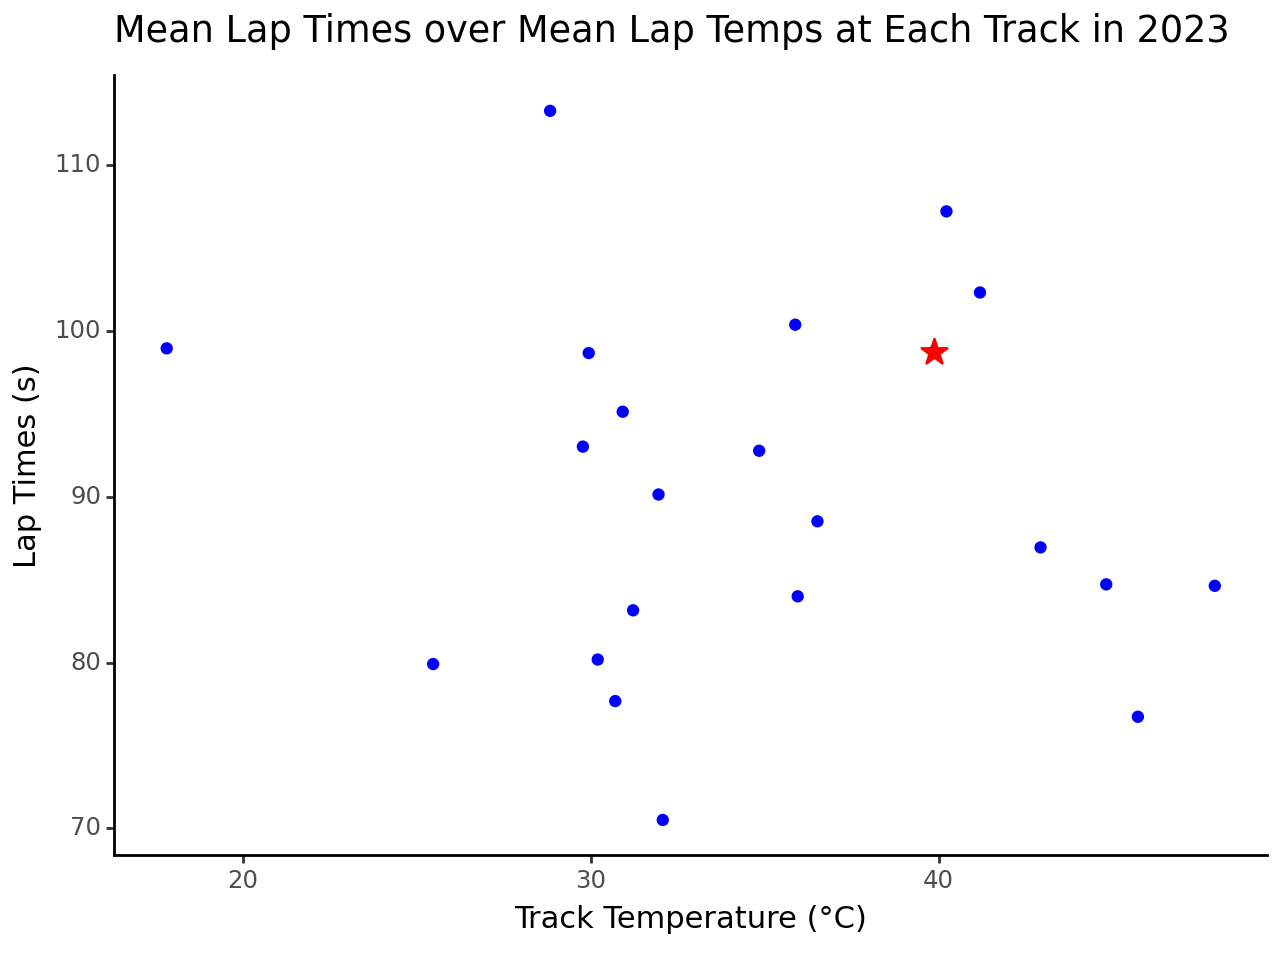

<Figure Size: (640 x 480)>

In [60]:
(ggplot(tracks, aes(x = 'TrackTemp_mean', y = 'LapTime_mean', color = 'factor(Event)')) +
 geom_point(color='blue') +
 geom_point(data=tracks[tracks['Event'] == 'Japanese Grand Prix'], color='red', size=5, shape='*') + \
 theme_classic() +
 labs(title = 'Mean Lap Times over Mean Lap Temps at Each Track in 2023',
      x = 'Track Temperature (°C)',
      y = 'Lap Times (s)'))

In [61]:
predictors = ['LapTime_mean', 'Sector1Time_mean', 'Sector2Time_mean',
              'Sector3Time_mean', 'SpeedI1_mean', 'SpeedI2_mean', 'SpeedFL_mean',
              'SpeedST_mean', 'TyreLife_mean', 'AirTemp_mean', 'Humidity_mean',
              'Pressure_mean', 'Rainfall_mean', 'TrackTemp_mean',
              'WindDirection_mean', 'WindSpeed_mean', 'LapTime_median',
              'Sector1Time_median', 'Sector2Time_median', 'Sector3Time_median',
              'SpeedI1_median', 'SpeedI2_median', 'SpeedFL_median', 'SpeedST_median',
              'TyreLife_median', 'AirTemp_median', 'Humidity_median',
              'Pressure_median', 'Rainfall_median', 'TrackTemp_median',
              'WindDirection_median', 'WindSpeed_median', 'LapTime_min',
              'Sector1Time_min', 'Sector2Time_min', 'Sector3Time_min', 'SpeedI1_min',
              'SpeedI2_min', 'SpeedFL_min', 'SpeedST_min', 'TyreLife_min',
              'AirTemp_min', 'Humidity_min', 'Pressure_min', 'Rainfall_min',
              'TrackTemp_min', 'WindDirection_min', 'WindSpeed_min', 'LapTime_max',
              'Sector1Time_max', 'Sector2Time_max', 'Sector3Time_max', 'SpeedI1_max',
              'SpeedI2_max', 'SpeedFL_max', 'SpeedST_max', 'TyreLife_max',
              'AirTemp_max', 'Humidity_max', 'Pressure_max', 'Rainfall_max',
              'TrackTemp_max', 'WindDirection_max', 'WindSpeed_max', 'LapTime_std',
              'Sector1Time_std', 'Sector2Time_std', 'Sector3Time_std', 'SpeedI1_std',
              'SpeedI2_std', 'SpeedFL_std', 'SpeedST_std', 'TyreLife_std',
              'AirTemp_std', 'Humidity_std', 'Pressure_std', 'Rainfall_std',
              'TrackTemp_std', 'WindDirection_std', 'WindSpeed_std']
x = tracks[predictors]

z = make_column_transformer((StandardScaler(), predictors),
                            remainder = 'passthrough')

In [62]:
session = fastf1.get_session(2024, 'Suzuka', 'R')
session.load(telemetry=False)
weather_data = session.laps.get_weather_data()
laps = session.laps
laps = laps.reset_index(drop=True)
weather_data = weather_data.reset_index(drop=True)
japanese_gp_2024 = pd.concat([laps, weather_data.loc[:, ~(weather_data.columns == 'Time')]], axis=1)
japanese_gp_2024['Year'] = 2024
japanese_gp_2024['Event'] = session.session_info['Meeting']['Name']

japanese_gp_2024 = japanese_gp_2024.loc[japanese_gp_2024['IsAccurate'] == True]
japanese_gp_2024 = japanese_gp_2024.loc[japanese_gp_2024['FastF1Generated'] == False]
japanese_gp_2024 = japanese_gp_2024.loc[japanese_gp_2024['Deleted'] == False]
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
japanese_gp_2024 = japanese_gp_2024.drop(columns=['LapStartDate','PitInTime', 'PitOutTime','DeletedReason','IsAccurate','FastF1Generated',
                                      'Deleted','Sector1SessionTime','Sector2SessionTime','Sector3SessionTime','LapStartTime'])
#https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
japanese_gp_2024[['AirTemp', 'Humidity','Pressure','TrackTemp','WindDirection','WindSpeed']] = japanese_gp_2024[['AirTemp', 'Humidity','Pressure','TrackTemp','WindDirection','WindSpeed']].apply(pd.to_numeric)
japanese_gp_2024 = japanese_gp_2024.astype({'Rainfall': bool})

japanese_gp_2024.dropna(inplace = True)

#https://stackoverflow.com/questions/21414639/convert-timedelta-to-floating-point
def convert_timedelta_to_seconds(df):
    for column in df.select_dtypes(include=['timedelta64']):
        df[column] = df[column].dt.total_seconds()
    return df
# Convert timedelta64 columns to seconds
japanese_gp_2024 = convert_timedelta_to_seconds(japanese_gp_2024)

# # Predict the cluster for the 2024 Japanese Grand Prix data
# japanese_gp_2024['cluster'] = pipe_hac.predict(japanese_gp_2024[predictors])

# # Print the predicted cluster for the 2024 Japanese Grand Prix
# print(f'The predicted cluster for the 2024 Japanese Grand Prix is: {japanese_gp_2024['cluster'].iloc[0]}')

core           INFO 	Loading data for Japanese Grand Prix - Race [v3.3.5]
INFO:fastf1.fastf1.core:Loading data for Japanese Grand Prix - Race [v3.3.5]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core       

In [63]:
suzuka_2024_metrics = get_track_data(japanese_gp_2024)
suzuka_2024 = suzuka_2024_metrics[0]
for i in range(1,5):
  # Similar to what I did earlier combining lap and weather data
  track_metric = suzuka_2024_metrics[i]
  suzuka_2024 = pd.concat([suzuka_2024, track_metric.loc[:, ~(track_metric.columns == 'Event')]], axis=1)

In [64]:
nn = NearestNeighbors(n_neighbors= 4)
pipe = Pipeline([('z', z), ('model', nn)])
pipe.fit(tracks[predictors])

distances, neighbors = pipe.named_steps['model'].kneighbors(pipe.named_steps['z'].transform(suzuka_2024[predictors]))
suzuka_2024 = suzuka_2024.assign(neighbors = list(neighbors))
suzuka_2024.head()

,Event,LapTime_mean,Sector1Time_mean,Sector2Time_mean,Sector3Time_mean,SpeedI1_mean,SpeedI2_mean,SpeedFL_mean,SpeedST_mean,TyreLife_mean,...,SpeedST_std,TyreLife_std,AirTemp_std,Humidity_std,Pressure_std,Rainfall_std,TrackTemp_std,WindDirection_std,WindSpeed_std,neighbors
0,Japanese Grand Prix,97.867392,35.663821,43.456085,18.747486,276.280488,298.808362,256.120209,297.317073,10.442509,...,6.351031,6.192886,0.835719,5.863461,0.231221,0.0,2.263771,18.651431,0.684767,"[6, 11, 18, 4]"


In [65]:
neighbor_name = tracks.iloc[neighbors[0]]['Event'].tolist()[0]
neighbor_name

'British Grand Prix'

In [66]:
neighbor_data = races_2023[races_2023['Event'] == neighbor_name]

predictors = ['Time', 'Driver', 'DriverNumber', 'LapNumber', 'Stint',
              'Sector1Time', 'Sector2Time', 'Sector3Time','SpeedI1', 'SpeedI2',
              'SpeedFL', 'SpeedST', 'IsPersonalBest', 'Compound', 'TyreLife',
              'FreshTyre', 'Team', 'TrackStatus', 'Position',
              'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp',
              'WindDirection', 'WindSpeed']

continuous = ['Sector1Time','Sector1Time', 'Sector2Time', 'Sector3Time', 'SpeedI1',
              'SpeedI2','SpeedFL', 'SpeedST','TyreLife','AirTemp', 'Humidity',
              'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed']

categorical = ['Time','Driver','DriverNumber','LapNumber','Stint','IsPersonalBest',
               'Compound','FreshTyre','Team','TrackStatus','Position']
outcome = ['LapTime']

x = neighbor_data[predictors]

y_2023 = neighbor_data[outcome]
y_2024 = japanese_gp_2024[outcome]

In [67]:
#Empty Model
pre = make_column_transformer((StandardScaler(), continuous),
                            (OneHotEncoder(handle_unknown='ignore'), categorical),
                            remainder = 'passthrough')

#Linear Regression
lr = LinearRegression()

pipe = Pipeline([('pre', pre), ('linear', lr)])

#Fit
pipe.fit(x, y_2023)

y_pred_2023 = pipe.predict(neighbor_data[predictors])
y_pred_2024 = pipe.predict(japanese_gp_2024[predictors])


print('Train MSE  : ', mean_squared_error(y_2023,y_pred_2023))
print('Train MAE  : ', mean_absolute_error(y_2023,y_pred_2023))
print('Train MAPE : ', mean_absolute_percentage_error(y_2023,y_pred_2023))
print('Train R2  : ', r2_score(y_2023,y_pred_2023))
print()
print('Test MSE  : ', mean_squared_error(y_2024,y_pred_2024))
print('Test MAE  : ', mean_absolute_error(y_2024,y_pred_2024))
print('Test MAPE : ', mean_absolute_percentage_error(y_2024,y_pred_2024))
print('Test R2  : ', r2_score(y_2024,y_pred_2024))

Train MSE  :  3.8735381706952925e-11
Train MAE  :  4.358219899180664e-06
Train MAPE :  4.684104385700185e-08
Train R2  :  0.9999999999663811

Test MSE  :  0.004460229079233006
Test MAE  :  0.06557504275380507
Test MAPE :  0.0006686444814603533
Test R2  :  0.9997684610887235


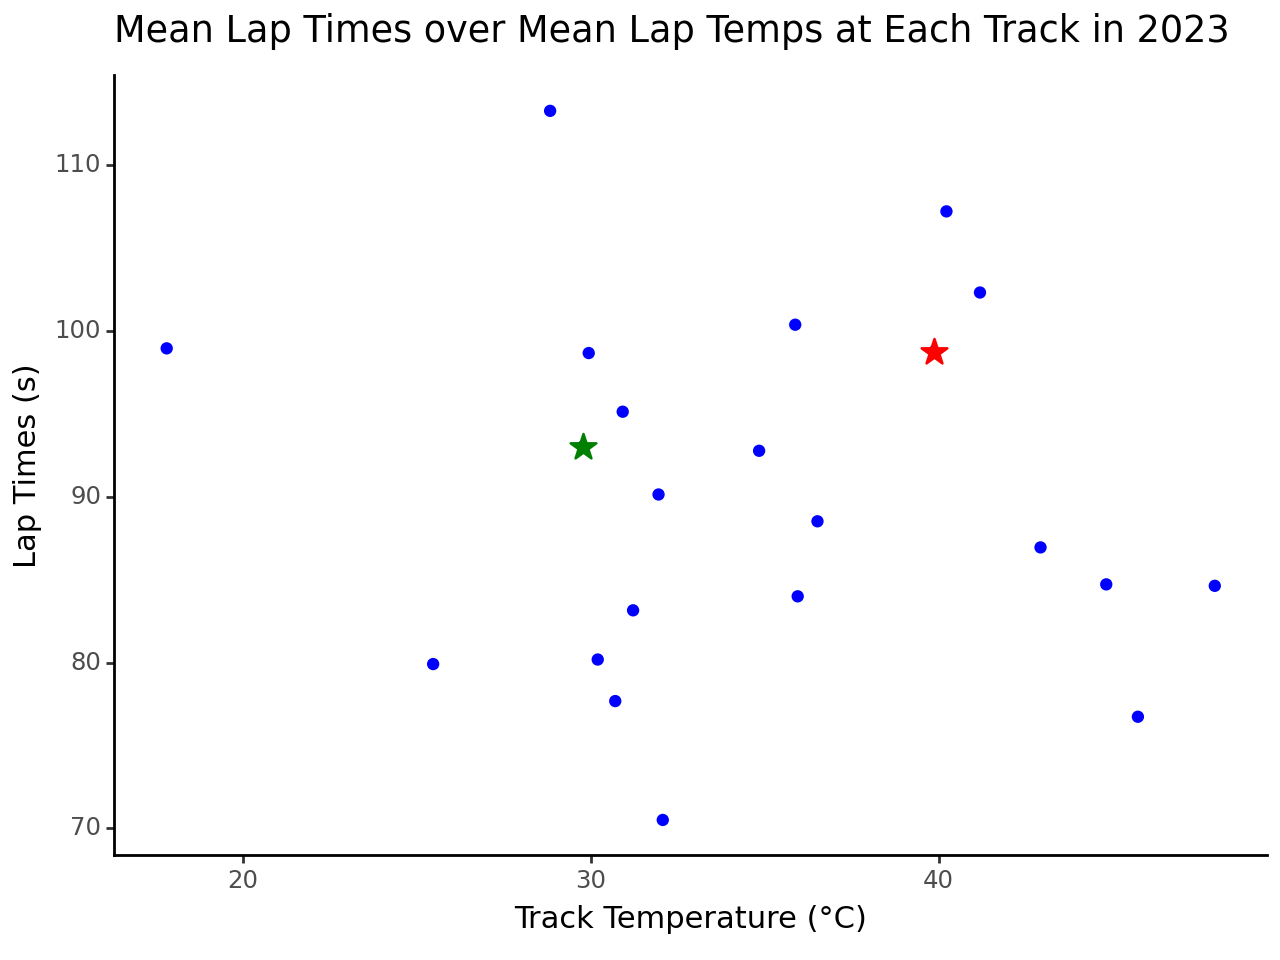

<Figure Size: (640 x 480)>

In [68]:
(ggplot(tracks, aes(x = 'TrackTemp_mean', y = 'LapTime_mean', color = 'factor(Event)')) +
 geom_point(color='blue') +
 geom_point(data=tracks[tracks['Event'] == 'Japanese Grand Prix'], color='red', size=5, shape='*') +
 geom_point(data=tracks[tracks['Event'] == neighbor_name], color='green', size=5, shape='*') +
 theme_classic() +
 labs(title = 'Mean Lap Times over Mean Lap Temps at Each Track in 2023',
      x = 'Track Temperature (°C)',
      y = 'Lap Times (s)'))